### Resampling and Horizontal Data Extraction Workbook Answers

This notebook is designed to give you more practice on using Pandas to group data according to intervals of time.  

It's built to reinforce lessons covered during the class on working with the `groupby` function, as well as the following one that covered window statistics.

All questions from this notebook are built upon the Sample Superstore dataset.

In [5]:
# load the libraries and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df = pd.read_excel('superstore.xls', index_col='Order Date', parse_dates=['Order Date'])

**Question 1:** What is the median monthly sum of sales in our dataset?

In [6]:
# take the sum of sales for each month in the dataset, find its mean
df.resample('M')['Sales'].sum().median()

39803.2485

**Question 2:** What month in the dataset had the highest median sale amount?

In [7]:
# your code here
df.resample('M')['Sales'].median().nlargest(1)

Order Date
2016-02-29    89.97
Freq: M, Name: Sales, dtype: float64

**Note:** Notice how the `nlargest()` method returns a **series**, which means it returns an index value along with the answer.  In this case this means we'll get the actual month returned along with the max value, which makes it a bit more informative.  

Calling `max()` would have given us the same answer, but we would have only gotten the value `89.97` returned.  This makes it useful if we want to use this value as an argument into another function, but not necessarily for just doing exploratory data analysis.

**Question 3:** How does this compare with the median sale amount for the dataset as a whole?

In [8]:
# median amount of sales column
df['Sales'].median()

54.489999999999995

It's 65% larger than the median sale amount for the entire dataset.

**Question 4:** What were the top 3 months in total units sold? (Hint:  there is a Quantity column)

In [9]:
# your code here
df.resample('M')['Quantity'].sum().nlargest(3)

Order Date
2017-11-30    1840
2017-12-31    1723
2017-09-30    1660
Name: Quantity, dtype: int64

**Question 5:** What was the difference in total sales between the highest and lowest grossing quarters?

In [10]:
# your code here
df.resample('Q')['Sales'].sum().max() - df.resample('Q')['Sales'].sum().min()

211202.32840000003

**Note:** Do you understand why I called `.sum().max()` and `.sum().min()` vs. just using `df.resample('Q')['Sales'].sum()`? 

It has to do with how and when calculations are applied to a multi-level index in Pandas.  This is a subtle, but important point, and one which has lots of important implications for how you do work in Pandas, so please make sure you understand it.  (And to make sure you hound me down if you have a question!)

**Question 6:** What day of the week has the highest volatility in profits, as measured by standard deviation?

In [11]:
# your code here
df.groupby(df.index.dayofweek)['Sales'].std().sort_values(ascending=False)

Order Date
1    897.519391
6    664.187150
3    599.258709
2    563.722611
4    561.111113
5    549.906887
0    527.940826
Name: Sales, dtype: float64

In Pandas, the weeks start on a Monday.  So apparently Tuesday is where the roller coaster is.

**Question 7a:** What is the middle 50% range of weekly sales for the Superstore? (ie, from the 25th to the 75th percentile?)

In [12]:
# solution 1: you can use the describe() method
df.resample('W')['Sales'].sum().describe()

count      209.000000
mean     10991.391676
std       7588.743786
min        227.236000
25%       5277.773500
50%       8866.177000
75%      14973.249000
max      38176.809000
Name: Sales, dtype: float64

In [13]:
# solution 2:  you can use the quantile() method to get certain percentile values to return an exact value
df.resample('W')['Sales'].sum().quantile(0.75) - df.resample('W')['Sales'].sum().quantile(0.25)

9695.4755

**Question 7b:** Can you find this answer graphically?

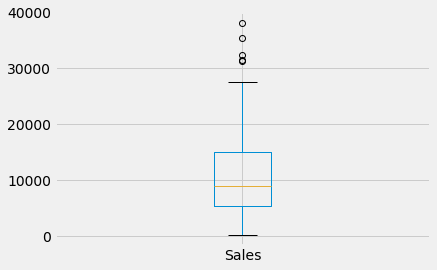

In [14]:
# you can use boxplots for this -- the box itself represents the middle 50% of values
df.resample('W')['Sales'].sum().plot(kind='box');

**Question 7c:** Can you write a function to find the middle 50 percent of sales?

There are a number of ways you could do this, but here is one.

In [15]:
# this is just a function that takes a SINGLE SERIES as an argument, and uses the quantile method to find its values
def mid_50(series):
    return series.quantile(.75) - series.quantile(0.25)

# remember - a grouped object is just a series when it's all said and done
grouped = df.resample('W')['Sales'].sum()
# so you can just pass it into this and get your result
mid_50(grouped)

9695.4755

**Question 8:** What is the average daily order volume in the dataset?

In [16]:
# resample on day, and then aggregate -- notice the double aggregation
df.resample('D')['Order ID'].count().mean()

6.854595336076818

**Question 9:** What is the average number of orders for days in the highest 10% of order volume and the lowest 10% of order volume?

In [17]:
# first, let's get a list of all the days in our dataset and their corresponding order volume
daily_orders = df.resample('D')['Order ID'].count()
# and take a look at what it is
daily_orders.head()

Order Date
2014-01-03    1
2014-01-04    3
2014-01-05    1
2014-01-06    9
2014-01-07    2
Freq: D, Name: Order ID, dtype: int64

In [18]:
# now, let's get the cutoff points for the 10th and 90th percentiles
top_10    = daily_orders.quantile(.9)
bottom_10 = daily_orders.quantile(0.1)

In [19]:
# this returns all values greater than 90th percentile -- and takes their average
top_10_mean = daily_orders[daily_orders > top_10].mean()

In [20]:
# and this does the same for the bottom 10%
bottom_10_mean = daily_orders[daily_orders < top_10].mean()

In [21]:
# and now we can see what they are
print(top_10_mean, bottom_10_mean)

21.185185185185187 5.17964533538936


**Question 10:** How does average daily order volume change on weekends vs. weekdays?

In [22]:
# test whether or not each day in the daily orders index is on the weekend or not -- Weekends are days 5 & 6
is_weekend = np.where(daily_orders.index.dayofweek > 4, True, False)

In [23]:
# and then pass this in as a boolean index, and take its average value for both conditions
avg_weekend_orders = daily_orders[is_weekend].mean()
avg_weekday_orders = daily_orders[~is_weekend].mean()

In [24]:
# and finally compare the two
print(avg_weekend_orders, avg_weekday_orders)

8.069544364508394 6.367915465898175
